Representation of a raw data set in the form of
 1.Area plot 
 2.Histogram
 3.Box plot
 4.Scatter plot

In [9]:
#importing Module required for Data visualisation
import numpy as np      # primary data structure library
import pandas as pd     # Useful for many scientific computing in python 
import matplotlib.pyplot as plt

df_canada=pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

#Let's view the top five elements of the data
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [10]:
# print the dimension of the data frame  
print(df_canada.shape)

(195, 43)


In [11]:
# Cleaning of the dataset to remove unneccesary columns
df_canada.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

#Let's view the top five elements of the data and see the data frame is changed 
df_canada.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [12]:
# let's rename the columns so that they make sense
df_canada.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'}, inplace=True)

df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [13]:
# for sake of consistency, let's check that all  the column labels are of type string
all(isinstance(column, str) for column in df_canada.columns)

False

In [14]:
# for sake of consistency, let's also make all column labels of type string
df_canada.columns = list(map(str ,df_canada.columns))

all(isinstance(column, str) for column in df_canada.columns)

True

In [15]:
# set the country name as index - useful for quickly looking up countries using .loc method
df_canada.set_index('Country',inplace=True)

df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [16]:
# add total column
df_canada['Total']=df_canada.sum(axis=1)

df_canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [17]:
years=list(map(str,range(1980,2014)))

In [18]:
#sort the data frame in descending order by the column "Total"
df_canada.sort_values(['Total'],ascending=False,axis=0,inplace=True)

# get the top 5 entries
df_canada_top5=df_canada.head()

# transpose the dataframe
df_canada_top5=df_canada_top5[years].transpose()

df_canada_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Ploting the new Data Frame as a area plot. 

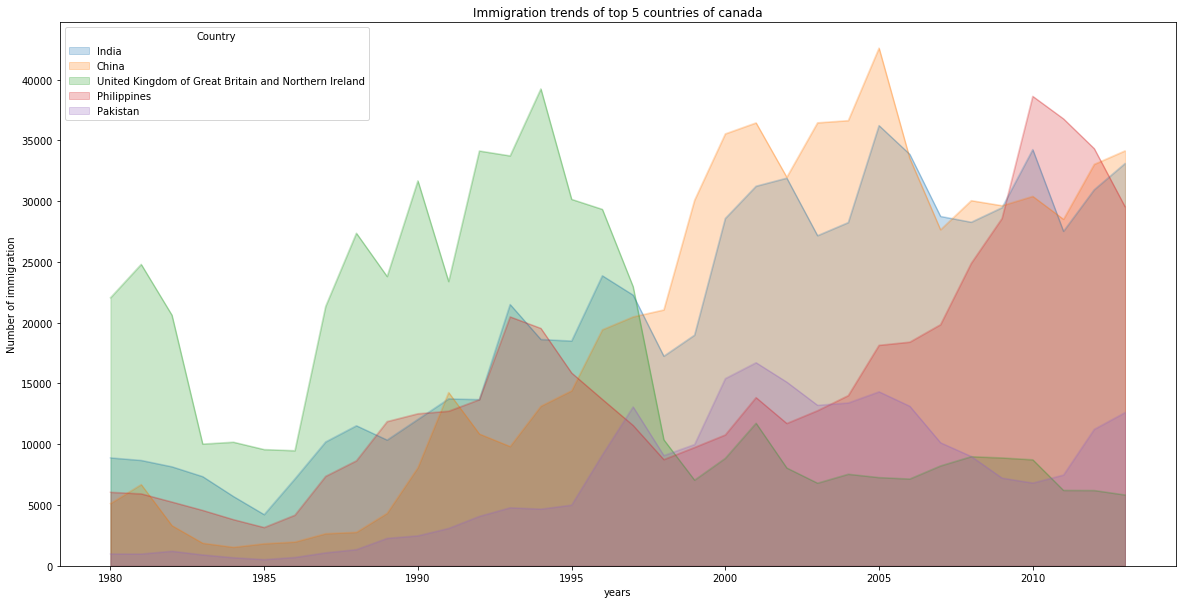

In [19]:
df_canada_top5.index=df_canada_top5.index.map(int)  # let's change the index values of df_top5 to type integer for plotting

df_canada_top5.plot(kind='area',
                     figsize=(20,10),
                     alpha=0.25,   
                     stacked=False)

plt.title('Immigration trends of top 5 countries of canada')  # add title to the area plot
plt.ylabel('Number of immigration')                          # add y-axis label   
plt.xlabel('years')                                         # add x-axis label

plt.show()

Ploting the Data Frame as a Histogram. 

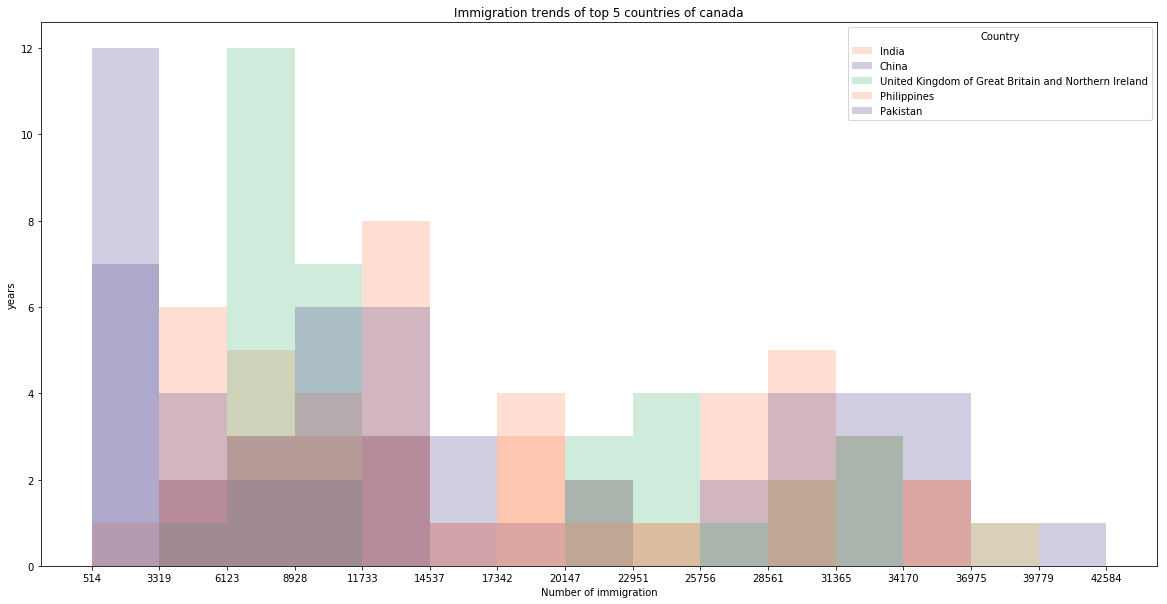

In [20]:
# 'bin_edges' is a list of bin intervals
count,bin_edges=np.histogram(df_canada_top5,15)

df_canada_top5.plot(kind='hist',
                    figsize=(20,10),
                    bins=15,
                    color=['coral','darkslateblue','mediumseagreen'],  # add custom color 
                    xticks=bin_edges,
                    stacked=False,                   # unstacked histogram
                    alpha=0.25)
plt.title('Immigration trends of top 5 countries of canada')   # add title to the histogram
plt.xlabel('Number of immigration')                   # add x-axis label
plt.ylabel('years')                                 # add y-axis label
plt.show()

In [21]:
# Form a new data frame of "China" and "india" only
df_CI=df_canada.loc[['China','India'], years].transpose()

# Let's view the top 5 elements of the new data frame
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [22]:
# get detailed information of the data frame
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


Ploting the new Data Frame as a Box plot. 

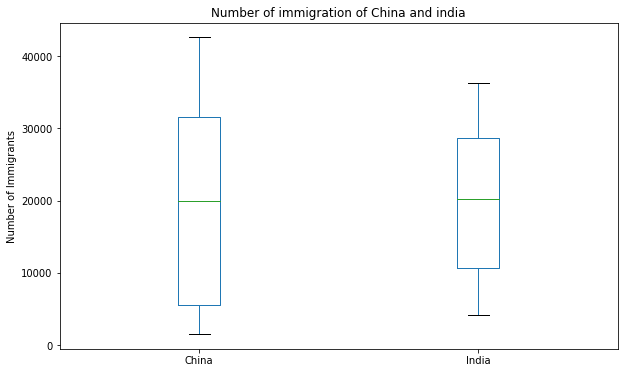

In [23]:
df_CI.plot(kind='box',
           figsize=(10,6))
            
plt.title('Number of immigration of China and india')   # add title to the box plot
plt.ylabel('Number of Immigrants')                  # add y-axis label

plt.show()

In [24]:
# we can use the sum() method to get the total population per year
df_total=pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type int 
df_total.index=map(int, df_total.index)

# reset the index to put in back in as a column in the df_total dataframe
df_total.reset_index(inplace = True)

# rename columns
df_total.columns=['years','Total']

# view the final dataframe
df_total.head()

,years,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Ploting the Data Frame as a Scatter plot. 

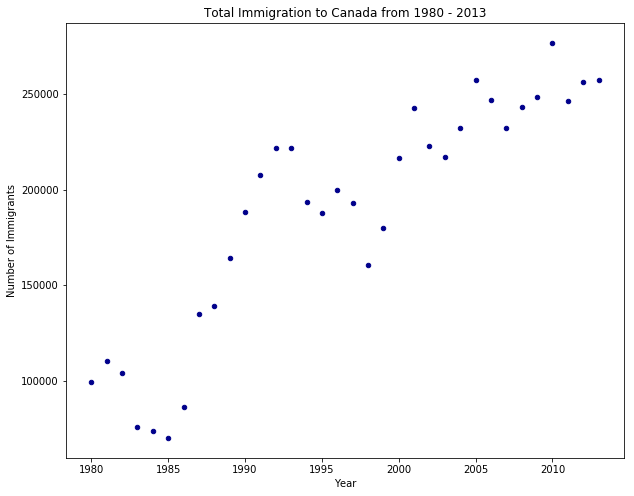

In [25]:
df_total.plot(kind='scatter',x='years',y='Total',figsize=(10,8),color='Darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')  # add title to the scatter plot
plt.xlabel('Year')                                      # add x-axis label
plt.ylabel('Number of Immigrants')                   # add y-axis label 

plt.show()